<a href="https://colab.research.google.com/github/LanxyL/Capstone2/blob/main/Notebook/Recommendation_System_on_Amazon_home_kitchen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

reviews = getDF('drive/My Drive/reviews_Home_and_Kitchen.json.gz')
meta = getDF('drive/My Drive/meta_Home_and_Kitchen.json.gz')

In [4]:
reviews.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A210NOCSTBT4OD,0076144011,Sheila,"[0, 0]",Have you ever thought about how you met your b...,4.0,Lovely,1349308800,"10 4, 2012"
1,A28ILV4TOG8BH2,0130350591,ccjensen,"[0, 0]","The butter dish is serving us well, and keepin...",5.0,"Nice looking, and keeps the butter fresh",1300752000,"03 22, 2011"
2,A31B4D7URW4DNZ,0307394530,3Gigi3,"[11, 16]",I anxiously waited for the book I had pre orde...,2.0,Mother of the Bride,1214784000,"06 30, 2008"
3,A2HU0RPDRZZOP1,0307394530,Alexey Leontev,"[0, 0]","Fantastic book, a lot of good, original recipe...",5.0,amazing book,1277337600,"06 24, 2010"
4,A7J0XOW7DYBBD,0307394530,Allan Mar Cariaso,"[0, 0]",Can't wait to try all the amazing techniques. ...,5.0,Very helpful,1393113600,"02 23, 2014"


In [5]:
meta.head(5)

,asin,salesRank,imUrl,categories,title,description,related,price,brand
0,0076144011,{'Books': 6285595},http://g-ecx.images-amazon.com/images/G/01/x-s...,[[Home & Kitchen]],"Ninjas, Piranhas, and Galileo",NaN,NaN,NaN,NaN
1,0130350591,{'Kitchen & Dining': 459680},http://ecx.images-amazon.com/images/I/21zcx6RC...,"[[Home & Kitchen, Kitchen & Dining, Dining & E...",Le Creuset Kiwi (Green) Butter Dish Stoneware,Each piece of Le Creuset dinnerware is crafted...,NaN,NaN,NaN
2,0307394530,"{'Arts, Crafts & Sewing': 3597}",http://ecx.images-amazon.com/images/I/51A4FWuj...,"[[Home & Kitchen, Artwork, Posters & Prints]]",Martha Stewart's Wedding Cakes,Of all the decisions that go into planning a w...,"{'also_bought': ['144630163X', '1402717733', '...",14.99,Random House
3,0439903491,{'Software': 7065},http://ecx.images-amazon.com/images/I/61tVxcko...,"[[Home & Kitchen, Artwork, Posters & Prints]]",NaN,Shiver me timbers! Solve I SPY pirate picture ...,"{'also_viewed': ['B000YFSZU8', 'B0016KWZB0', '...",29.99,NaN
4,0578060604,NaN,http://ecx.images-amazon.com/images/I/41aCELWJ...,"[[Home & Kitchen, Furniture, Kitchen & Dining ...",Build A Maloof Inspired Low Back Dining Chair ...,The Maloofinspired Low Back Dining Chair is no...,{'also_viewed': ['B004IO6RS8']},NaN,NaN


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253926 entries, 0 to 4253925
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   reviewerID      object 
 1   asin            object 
 2   reviewerName    object 
 3   helpful         object 
 4   reviewText      object 
 5   overall         float64
 6   summary         object 
 7   unixReviewTime  int64  
 8   reviewTime      object 
dtypes: float64(1), int64(1), object(7)
memory usage: 324.5+ MB


In [7]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436988 entries, 0 to 436987
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   asin         436988 non-null  object 
 1   salesRank    414167 non-null  object 
 2   imUrl        436617 non-null  object 
 3   categories   436988 non-null  object 
 4   title        435249 non-null  object 
 5   description  405793 non-null  object 
 6   related      300857 non-null  object 
 7   price        285168 non-null  float64
 8   brand        152611 non-null  object 
dtypes: float64(1), object(8)
memory usage: 33.3+ MB


In [8]:
#Convert 'unixReviewTime' column to datetime object
from datetime import datetime

date_times = lambda x: datetime.fromtimestamp(x).strftime('%m-%d-%Y')
reviews.unixReviewTime = reviews.unixReviewTime.apply(date_times)
reviews.unixReviewTime.head(5)

0    10-04-2012
1    03-22-2011
2    06-30-2008
3    06-24-2010
4    02-23-2014
Name: unixReviewTime, dtype: object

In [9]:
#Drop redundant column which also represents review time
reviews.drop('reviewTime', axis=1, inplace=True)

In [15]:
#Reviewer can be identified by reviewerID, drop the reviewerName column which is redundant
reviews.drop('reviewerName', axis=1, inplace=True)

In [21]:
#Drop imURL since it will not be used for the recommendation system
meta.drop('imUrl', axis=1, inplace=True)

In [22]:
combined = pd.merge(reviews, meta,on='asin', how='left')

In [23]:
combined.head(5).T

,0,1,2,3,4
reviewerID,A210NOCSTBT4OD,A28ILV4TOG8BH2,A31B4D7URW4DNZ,A2HU0RPDRZZOP1,A7J0XOW7DYBBD
asin,0076144011,0130350591,0307394530,0307394530,0307394530
helpful,"[0, 0]","[0, 0]","[11, 16]","[0, 0]","[0, 0]"
reviewText,Have you ever thought about how you met your b...,"The butter dish is serving us well, and keepin...",I anxiously waited for the book I had pre orde...,"Fantastic book, a lot of good, original recipe...",Can't wait to try all the amazing techniques. ...
overall,4,5,2,5,5
summary,Lovely,"Nice looking, and keeps the butter fresh",Mother of the Bride,amazing book,Very helpful
unixReviewTime,10-04-2012,03-22-2011,06-30-2008,06-24-2010,02-23-2014
salesRank,{'Books': 6285595},{'Kitchen & Dining': 459680},"{'Arts, Crafts & Sewing': 3597}","{'Arts, Crafts & Sewing': 3597}","{'Arts, Crafts & Sewing': 3597}"
categories,[[Home & Kitchen]],"[[Home & Kitchen, Kitchen & Dining, Dining & E...","[[Home & Kitchen, Artwork, Posters & Prints]]","[[Home & Kitchen, Artwork, Posters & Prints]]","[[Home & Kitchen, Artwork, Posters & Prints]]"
title,"Ninjas, Piranhas, and Galileo",Le Creuset Kiwi (Green) Butter Dish Stoneware,Martha Stewart's Wedding Cakes,Martha Stewart's Wedding Cakes,Martha Stewart's Wedding Cakes


In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4253926 entries, 0 to 4253925
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   reviewerID      object 
 1   asin            object 
 2   helpful         object 
 3   reviewText      object 
 4   overall         float64
 5   summary         object 
 6   unixReviewTime  object 
 7   salesRank       object 
 8   categories      object 
 9   title           object 
 10  description     object 
 11  related         object 
 12  price           float64
 13  brand           object 
dtypes: float64(2), object(12)
memory usage: 486.8+ MB


## **Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Amazon Review Rating')

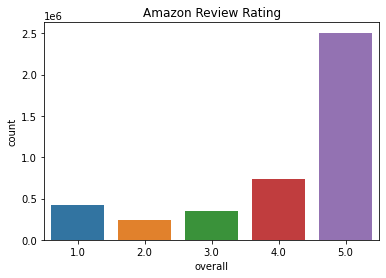

In [25]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(combined.overall)
plt.title('Amazon Review Rating')

In [26]:
combined.overall.describe()

count    4.253926e+06
mean     4.099486e+00
std      1.331712e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [32]:
combined.unixReviewTime = pd.to_datetime(combined.unixReviewTime)

In [37]:
combined['year'] = combined.unixReviewTime.dt.year

In [39]:
combined['month'] = combined.unixReviewTime.dt.month

Text(0.5, 1.0, 'Number of reviews over years')

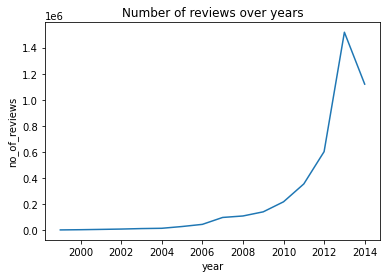

In [53]:
yearly = combined.groupby(['year'])['reviewerID'].count().reset_index()
yearly = yearly.rename(columns={'reviewerID':'no_of_reviews'})
sns.lineplot(x='year', y='no_of_reviews', data=yearly)
plt.title('Number of reviews over years')

The number of reviews increase over time. However, it went down from 2013 to 2014. The increasing trend for the reviews indicates that more and more users start using Amazon. The peak on 2013 might be raised by an promotion which boost the number of reviewer.

Text(0.5, 1.0, 'Number of reviews over month')

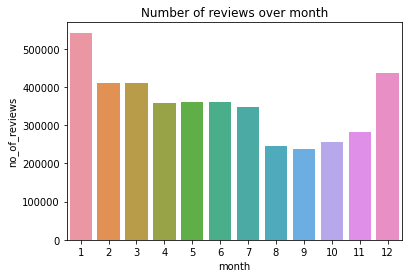

In [55]:
monthly = combined.groupby(['month'])['reviewerID'].count().reset_index()
monthly = monthly.rename(columns={'reviewerID':'no_of_reviews'})
sns.barplot(x='month', y='no_of_reviews', data=monthly)
plt.title('Number of reviews over month')

The number of reviews get highest on January and December. It might related to the holiday season. Before the holiday season, people were less interested on shopping.  

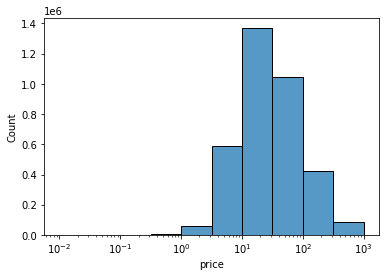

In [58]:
sns.histplot(x='price', data=combined, log_scale=True, bins=10)

In [59]:
combined.price.describe()

count    3.576482e+06
mean     5.716747e+01
std      8.738777e+01
min      1.000000e-02
25%      1.299000e+01
50%      2.620000e+01
75%      5.999000e+01
max      9.999900e+02
Name: price, dtype: float64

Most of the items are between 13 to 60 dollars. It implies that customers prefer items in this price range on Amazon. 

In [64]:
def wordlength(x):
  return len(x.split())
combined['reviewlength'] = combined.reviewText.apply(wordlength)

In [65]:
combined['reviewlength'].describe()

count    4.253926e+06
mean     7.000801e+01
std      8.227211e+01
min      0.000000e+00
25%      2.600000e+01
50%      4.400000e+01
75%      8.100000e+01
max      5.973000e+03
Name: reviewlength, dtype: float64

In [70]:
combined.iloc[combined[['reviewlength']].idxmax()].T

,3509078
reviewerID,A30UFXOF0GS9NM
asin,B007JOJ9QQ
helpful,"[4, 4]"
reviewText,I think someone left their Super Nintendo in t...
overall,4
summary,Mostly awesome except for missing edges
unixReviewTime,2013-11-04 00:00:00
salesRank,{'Home &amp; Kitchen': 3349}
categories,"[[Home & Kitchen, Vacuums & Floor Care, Vacuum..."
title,Neato XV-21 Pet &amp; Allergy Automatic Vacuum...


In [82]:
from IPython.display import display, HTML

longest_txt = combined['reviewText'].iloc[combined[['reviewlength']].idxmax()]
display(HTML(pd.DataFrame(longest_txt).to_html()))